# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.333569e+01     1.486561e+01
 * time: 0.0037720203399658203
     1     6.257620e+01     8.242760e+00
 * time: 0.010973930358886719
     2     5.856577e+01     1.140604e+01
 * time: 0.027557849884033203
     3     4.042553e+01     7.263060e+00
 * time: 0.049867868423461914
     4     2.977652e+01     6.194626e+00
 * time: 0.16269993782043457
     5     1.983972e+01     3.964042e+00
 * time: 0.1825399398803711
     6     1.371952e+01     2.920277e+00
 * time: 0.19864797592163086
     7     1.071162e+01     4.711240e+00
 * time: 0.2108469009399414
     8     9.390488e+00     2.381500e+00
 * time: 0.22558999061584473
     9     8.540019e+00     2.169902e+00
 * time: 0.24030494689941406
    10     8.007041e+00     2.223172e+00
 * time: 0.2523329257965088
    11     7.482835e+00     2.504874e+00
 * time: 0.26424384117126465
    12     7.068078e+00     1.627272e+00
 * time: 0.2759737968444824
    13     6.721014e+00     1.951018e+00
 * time

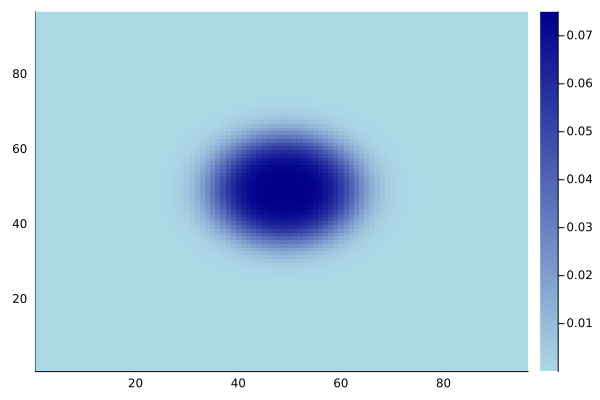

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)